In [1]:
%pip install llama-index-multi-modal-llms-openai

  Using cached pydantic-2.10.5-py3-none-any.whl.metadata (30 kB)
Using cached pydantic-2.10.5-py3-none-any.whl (431 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-chroma 0.2.0 requires chromadb!=0.5.10,!=0.5.11,!=0.5.12,!=0.5.4,!=0.5.5,!=0.5.7,!=0.5.9,<0.6.0,>=0.4.0, which is not installed.
unstructured-client 0.28.1 requires pydantic<2.10.0,>=2.9.2, but you have pydantic 2.10.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install llama-index

  Using cached llama_index-0.12.10-py3-none-any.whl.metadata (11 kB)
Using cached llama_index-0.12.10-py3-none-any.whl (6.8 kB)


In [41]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()
# Retrieve the OpenAI API key from environment variables
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [4]:
from llama_index.core import SimpleDirectoryReader
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o",
    api_key=OPENAI_API_KEY,
    max_new_tokens=500,
    temperature=0.0,
)

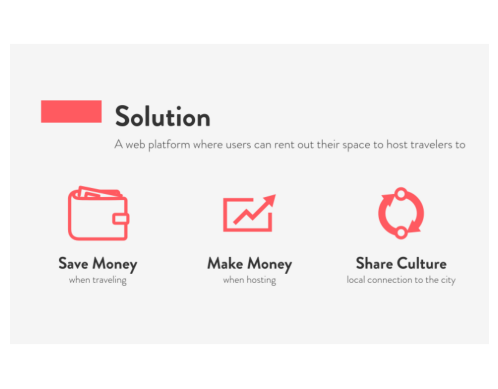

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

# Correct the file path
img = Image.open("../data/slides/AirBnB_Pitch_Deck_slide3.png")
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [9]:
# put your local directory here
image_documents = SimpleDirectoryReader(
    input_files=["../data/slides/AirBnB_Pitch_Deck_slide3.png"]
).load_data()

In [13]:
query = "Analyse the image"
# query = "Describe the image in-depth"

response_1 = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_1)

The image presents a solution for a web platform where users can rent out their space to host travelers. It highlights three main benefits:

1. **Save Money**: Users can save money when traveling.
2. **Make Money**: Users can earn money by hosting.
3. **Share Culture**: Users can provide a local connection to the city.

Each benefit is accompanied by a simple icon: a wallet for saving money, a graph for making money, and a circular connection for sharing culture. The design is clean and uses a red color scheme for emphasis.


In [12]:
# query = "Analyse the image"
query = "Describe the image in-depth"

response_2 = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_2)

The image is a slide with a clean, minimalist design. It features a section titled "Solution" in bold text. Below the title, there's a brief description: "A web platform where users can rent out their space to host travelers to."

Underneath the description, there are three icons with accompanying text:

1. **Save Money**: Represented by a wallet icon, with the subtext "when traveling."
2. **Make Money**: Illustrated with a graph icon showing an upward trend, with the subtext "when hosting."
3. **Share Culture**: Depicted by a circular icon with arrows, with the subtext "local connection to the city."

The overall color scheme is light gray with red accents for the icons and title.


In [37]:
import os
from llama_index.core import SimpleDirectoryReader
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.embeddings.openai import OpenAIEmbedding
import chromadb
from chromadb.config import DEFAULT_TENANT, DEFAULT_DATABASE, Settings
from llama_index.embeddings.openai import OpenAIEmbedding

# Initialize OpenAIMultiModal
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o",
    api_key=OPENAI_API_KEY,
    max_new_tokens=500,
    temperature=0.0,
)

# Initialize ChromaDB client with the existing settings
client = chromadb.PersistentClient(
    path=persist_directory,
    settings=Settings(),
    tenant=DEFAULT_TENANT,
    database=DEFAULT_DATABASE,
)

collection_name = 'GPT-4o_embedding_collection'
collection = client.create_collection(collection_name)

# Initialize OpenAIEmbedding
embedder = OpenAIEmbedding(api_key=OPENAI_API_KEY)

# Directory containing images
image_directory = "../data/slides"

# Load all images from the directory
image_files = [os.path.join(image_directory, f) for f in os.listdir(image_directory) if f.endswith('.png')]

# Process each image
for image_file in image_files:
    # Load image document
    image_documents = SimpleDirectoryReader(input_files=[image_file]).load_data()
    
    # Define the query
    query = "Analyse the image"
    
    # Get the response
    response = openai_mm_llm.complete(
        prompt=query,
        image_documents=image_documents,
    )
    print(f'The image is: {image_file}')
    print(response)
    print('---------------------------------')
    
    # Embed the response
    embedding = embedder.get_text_embedding(response.text)
    
    # Add the embedding to the collection
    collection.add(
        ids=[image_file],
        embeddings=[embedding],
        metadatas=[{"source": image_file}]
    )

print("All responses embedded and added to ChromaDB collection.")

The image is: ../data/slides/AirBnB_Pitch_Deck_slide10.png
The image presents a business model for Airbnb. Here are the key points:

- **Commission**: Airbnb takes a 10% commission on each transaction.
- **Market Size**: $84 million in trips with Airbnb, representing 15% of the available market.
- **Average Fee**: $25, based on an average of $80 per night for 3 nights.
- **Projected Revenue**: $200 million, projected by 2011.

The model highlights Airbnb's revenue strategy and market penetration.
---------------------------------
The image is: ../data/slides/AirBnB_Pitch_Deck_slide11.png
The image appears to be a slide from a presentation about Airbnb's market adoption strategy. It is divided into three sections:

1. **Events**: 
   - Lists target events with their monthly attendance figures:
     - Octoberfest (6M)
     - Cebit (700,000)
     - Summerfest (1M)
     - Eurocup (3M+)
     - Mardi Gras (800,000)

2. **Partnerships**: 
   - Focuses on cheap/alternative travel options:
    

In [60]:
# if needed, delete the collection
# client.delete_collection(collection_name)

In [40]:
# Retrieve and print the metadata of the embeddings for this specific collection
documents = collection.get(include=['embeddings', 'metadatas'])

for doc_id, embedding, metadata in zip(documents['ids'], documents['embeddings'], documents['metadatas']):
    print(f"Collection: {collection_name}")
    print(f"ID: {doc_id}")
    print(f"Metadata: {metadata}")
    print(f"Embedding (first 5 elements): {embedding[:5]}...")
    print("-" * 50)

Collection: GPT-4o_embedding_collection
ID: ../data/slides/AirBnB_Pitch_Deck_slide10.png
Metadata: {'source': '../data/slides/AirBnB_Pitch_Deck_slide10.png'}
Embedding (first 5 elements): [ 0.01811481 -0.00369524  0.02156587 -0.03268741  0.0200422 ]...
--------------------------------------------------
Collection: GPT-4o_embedding_collection
ID: ../data/slides/AirBnB_Pitch_Deck_slide11.png
Metadata: {'source': '../data/slides/AirBnB_Pitch_Deck_slide11.png'}
Embedding (first 5 elements): [ 0.00145554 -0.01187766  0.0243317  -0.01299612 -0.00979169]...
--------------------------------------------------
Collection: GPT-4o_embedding_collection
ID: ../data/slides/AirBnB_Pitch_Deck_slide13.png
Metadata: {'source': '../data/slides/AirBnB_Pitch_Deck_slide13.png'}
Embedding (first 5 elements): [ 0.00483316 -0.00361567  0.00688348 -0.00129024 -0.03181521]...
--------------------------------------------------
Collection: GPT-4o_embedding_collection
ID: ../data/slides/AirBnB_Pitch_Deck_slide12.png

In [95]:
import os
import chromadb
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex, Document
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import StorageContext
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index.embeddings.openai import OpenAIEmbedding

# Set your OpenAI API key
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY", "your_openai_api_key_here")

# Directory to persist ChromaDB
persist_directory = "../data/chromadb"

# Initialize ChromaDB Persistent Client
db = chromadb.PersistentClient(path=persist_directory)

# Get or create a ChromaDB collection
collection_name = "gpt-4o-embeddings"
chroma_collection = db.get_or_create_collection(collection_name)

# Create ChromaVectorStore and StorageContext
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)

# Initialize OpenAIMultiModal
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o",
    api_key=OPENAI_API_KEY,
    max_new_tokens=500,
    temperature=0.0,
)

# Directory containing images
image_directory = "../data/slides"

# Check if image directory exists
if not os.path.isdir(image_directory):
    print(f"Error: Directory '{image_directory}' does not exist.")
    exit(1)

# Load all image files from the directory
image_files = [
    os.path.join(image_directory, f)
    for f in os.listdir(image_directory)
    if f.endswith(".png")
]

# Process each image and build documents
documents = []
for image_file in image_files:
    try:
        # Load image document
        image_documents = SimpleDirectoryReader(input_files=[image_file]).load_data()

        # Define the query
        query = "Analyze the image"

        # Get the response
        response = openai_mm_llm.complete(
            prompt=query,
            image_documents=image_documents,
        )
        print(f"Processing image: {image_file}")
        print(f"Response: {response.text}")
        print("---------------------------------")

        # Convert the response to a Document object
        document = Document(
            text=response.text,
            doc_id=os.path.basename(image_file),  # Use filename as ID
            extra_info={"source": image_file},
        )
        documents.append(document)

    except Exception as e:
        print(f"Error processing {image_file}: {e}")

# Build a VectorStoreIndex using the processed documents
if documents:
    chroma_index = VectorStoreIndex.from_documents(
        documents=documents,
        storage_context=storage_context,
        show_progress=True,
    )
    print("Index built successfully and saved to ChromaDB.")
else:
    print("No documents were processed to build the index.")


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Processing image: ../data/slides/AirBnB_Pitch_Deck_slide10.png
Response: The image presents a business model for Airbnb, highlighting key financial metrics:

1. **Commission Structure**: Airbnb takes a 10% commission on each transaction.

2. **Market Data**:
   - **$84M**: Represents the value of trips booked with Airbnb, which is 15% of the available market.
   - **$25**: The average fee per transaction, based on $80 per night for three nights.

3. **Revenue Projection**:
   - **$200M**: Projected revenue by 2011.

The model emphasizes Airbnb's revenue generation through commissions and provides insights into its market penetration and pricing strategy.
---------------------------------
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com

Parsing nodes:   0%|          | 0/18 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/18 [00:00<?, ?it/s]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
Index built successfully and saved to ChromaDB.


In [ ]:
# Convert the index to a retriever
retriever = chroma_index.as_retriever(top_k=2)

# Define your query
query_text = 'What is the market size of Airbnb and who are the founders?'

# Perform the retrieval
response = retriever.retrieve(query_text)

# Print the response
print("Query Response:")
print(response)

for element in response:
    print(element)



INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
Query Response:
[NodeWithScore(node=TextNode(id_='cf02cecd-f809-4b20-8138-2036da8b4196', embedding=None, metadata={'source': '../data/slides/AirBnB_Pitch_Deck_slide5.png'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='AirBnB_Pitch_Deck_slide5.png', node_type='4', metadata={'source': '../data/slides/AirBnB_Pitch_Deck_slide5.png'}, hash='53a81897fb6a64c471cc9b57a1d04e3969fb43aca807c493d1721a8ef83daf24')}, metadata_template='{key}: {value}', metadata_separator='\n', text="The image presents data on the market size for the travel industry. Here are the key points:\n\n1. **Total Available Market**: \n   - 2 billion trips are booked worldwide.\n   - Source: Travel Industry Association of America and World Tourism Organization.\n\n2. **Serviceable

In [ ]:
from llama_index.core.response_synthesizers import ResponseMode
from llama_index.core import get_response_synthesizer

# Initialize the response synthesizer
response_synthesizer = get_response_synthesizer(response_mode=ResponseMode.COMPACT)

# Create a query engine with the synthesizer
query_engine = chroma_index.as_query_engine(response_synthesizer=response_synthesizer)

# Define your query
query_text = "What are the most important points from the slides?"

# Perform the query
response = query_engine.query(query_text)

# Print the synthesized response
print("Synthesized Response:")
print(response)



INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Synthesized Response:
The slides focus on two key elements: "Product" and "Competition." The minimalist design, featuring a red rectangle and simple text, along with the clean and modern style, suggests a professional and organized presentation. The use of the Airbnb logo in the top right corner reinforces the branding. These slides likely aim to introduce and highlight aspects related to the product and competition within the context of the presentation.


In [125]:
from llama_index.core.response_synthesizers import ResponseMode
from llama_index.core import get_response_synthesizer

# Initialize the response synthesizer
response_synthesizer = get_response_synthesizer(response_mode=ResponseMode.COMPACT)

# Create a query engine with the synthesizer and set top_k for the retriever
query_engine = chroma_index.as_query_engine(
    response_synthesizer=response_synthesizer,
    retriever_mode="default",  # Use default retriever mode
    retriever_kwargs={"top_k": 2}  # Set top_k to control the number of nodes retrieved
)

# Define your query
query_text = 'What is the market size of Airbnb and who are the founders?'

# Perform the query
response = query_engine.query(query_text)

# Print the synthesized response
print("Synthesized Response:")
print(response)


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Synthesized Response:
The market size of Airbnb is 84 million trips, representing 15% of the available market. The founders of Airbnb are Brian Chesky, Joe Gebbia, and Nathan Blecharczyk.


In [135]:
from llama_index.core.response_synthesizers import ResponseMode
from llama_index.core import get_response_synthesizer

# Initialize the response synthesizer
response_synthesizer = get_response_synthesizer(response_mode=ResponseMode.COMPACT)

# Create a query engine with the synthesizer and set top_k for the retriever
query_engine = chroma_index.as_query_engine(
    response_synthesizer=response_synthesizer,
    retriever_mode="default",  # Use default retriever mode
    retriever_kwargs={"top_k": 10}  # Set top_k to control the number of nodes retrieved
)

# Define your query
query_text = 'What is the market size of Airbnb and who are the founders?'

# Perform the query
response = query_engine.query(query_text)

# Print the retrieved chunks
print("Retrieved Chunks:")
for element in response.source_nodes:
    print(element.node.text)
    print("-" * 50)

# Print the synthesized response
print("Synthesized Response:")
print(response)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Retrieved Chunks:
The image presents data on the market size for the travel industry. Here are the key points:

1. **Total Available Market**: 
   - 2 billion trips are booked worldwide.
   - Source: Travel Industry Association of America and World Tourism Organization.

2. **Serviceable Available Market**: 
   - Over $560 million is budgeted for online services.
   - Source: comScore.

3. **Share of Market**: 
   - 84 million trips are made with Airbnb.
   - This represents 15% of the available market.

The image provides a snapshot of the travel market, focusing on the scale of trips, the financial scope of online services, and Airbnb's market share.
---------